# Decision Tree 
**First We Import pandas to read csv file**

In [1]:
# Load libraries
import pandas as pd

**The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.**

**We used this database from kaggle https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database**

In [2]:
# load dataset
dataset = pd.read_csv("diabetes.csv")

**Using shape function from pandas**

In [3]:
dataset.shape

(768, 9)

**Next We present the first 5 rows by head() function**

In [4]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Splitting
**Split the attributes or the features so that we can train the model**

In [5]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = dataset[feature_cols] # Features
y = dataset.Outcome # Target variable

**Next We import the train split from scikit learn**

In [6]:
from sklearn.model_selection import train_test_split # Import train_test_split function
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

**Firstly we import and create the DecisionTreeClassifier object**

**Secondly we train the model with the split percentage that we chose in the previous step**

**Thirdly We use the model that we trained to test the testdata**

In [7]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Evaluation 
**We import metrices from scikit learn to know how accurate our model were with the test data**

**you can see different kinds of measurements from here https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics**

In [8]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [9]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))

Accuracy: 0.6753246753246753
F1 Score: 0.5283018867924529


# Visualization

**We import both matplotlib and plot_tree to visualize the tree**

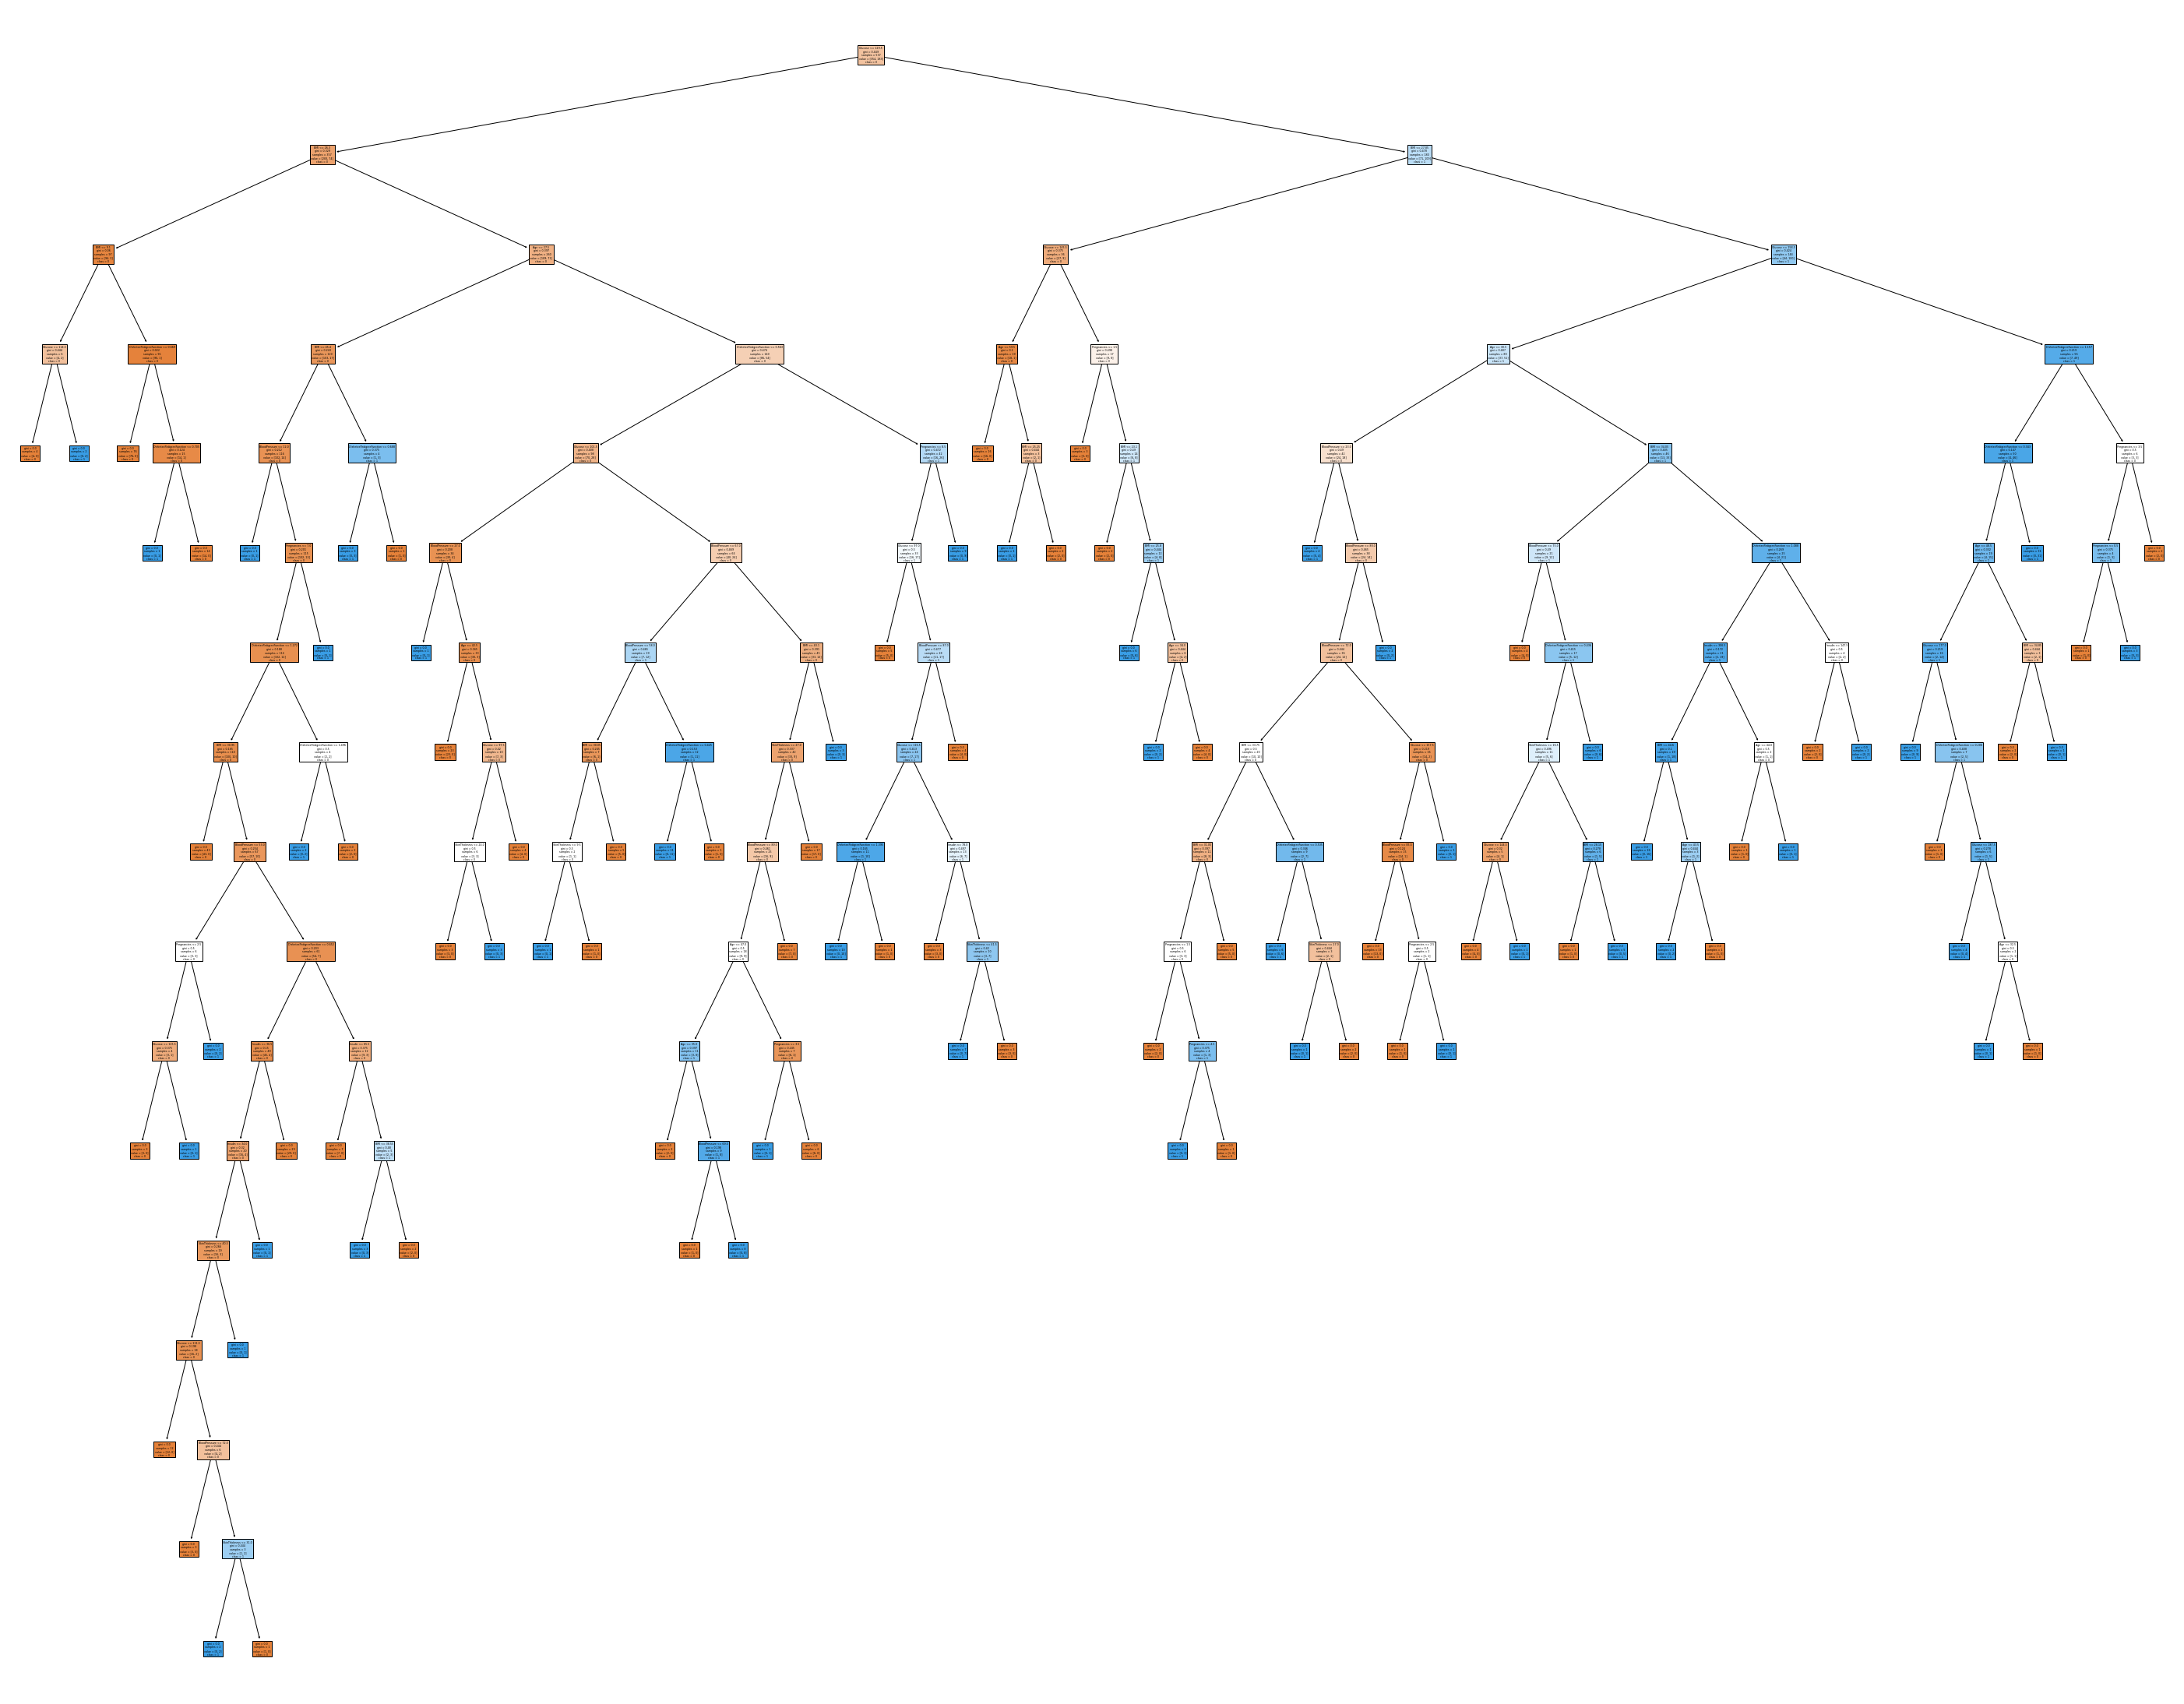

In [10]:
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(50,40))
plot_tree(clf, feature_names=feature_cols, class_names=['0','1'], filled=True)
plt.show()

# Optimizing
**criterion :  Choose attribute selection measure: This parameter allows us to use the different-different attribute selection measure.
Supported criteria are “gini” for the Gini index and “entropy” for the information gain.**

**max_depth : The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples.**

**The higher value of maximum depth causes overfitting, and a lower value causes underfitting**

**Let's choose 3 as the max_depth to have a simple and readable Tree**

In [11]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3) #ID3

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [12]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))

Accuracy: 0.7705627705627706
F1 Score: 0.6708074534161491


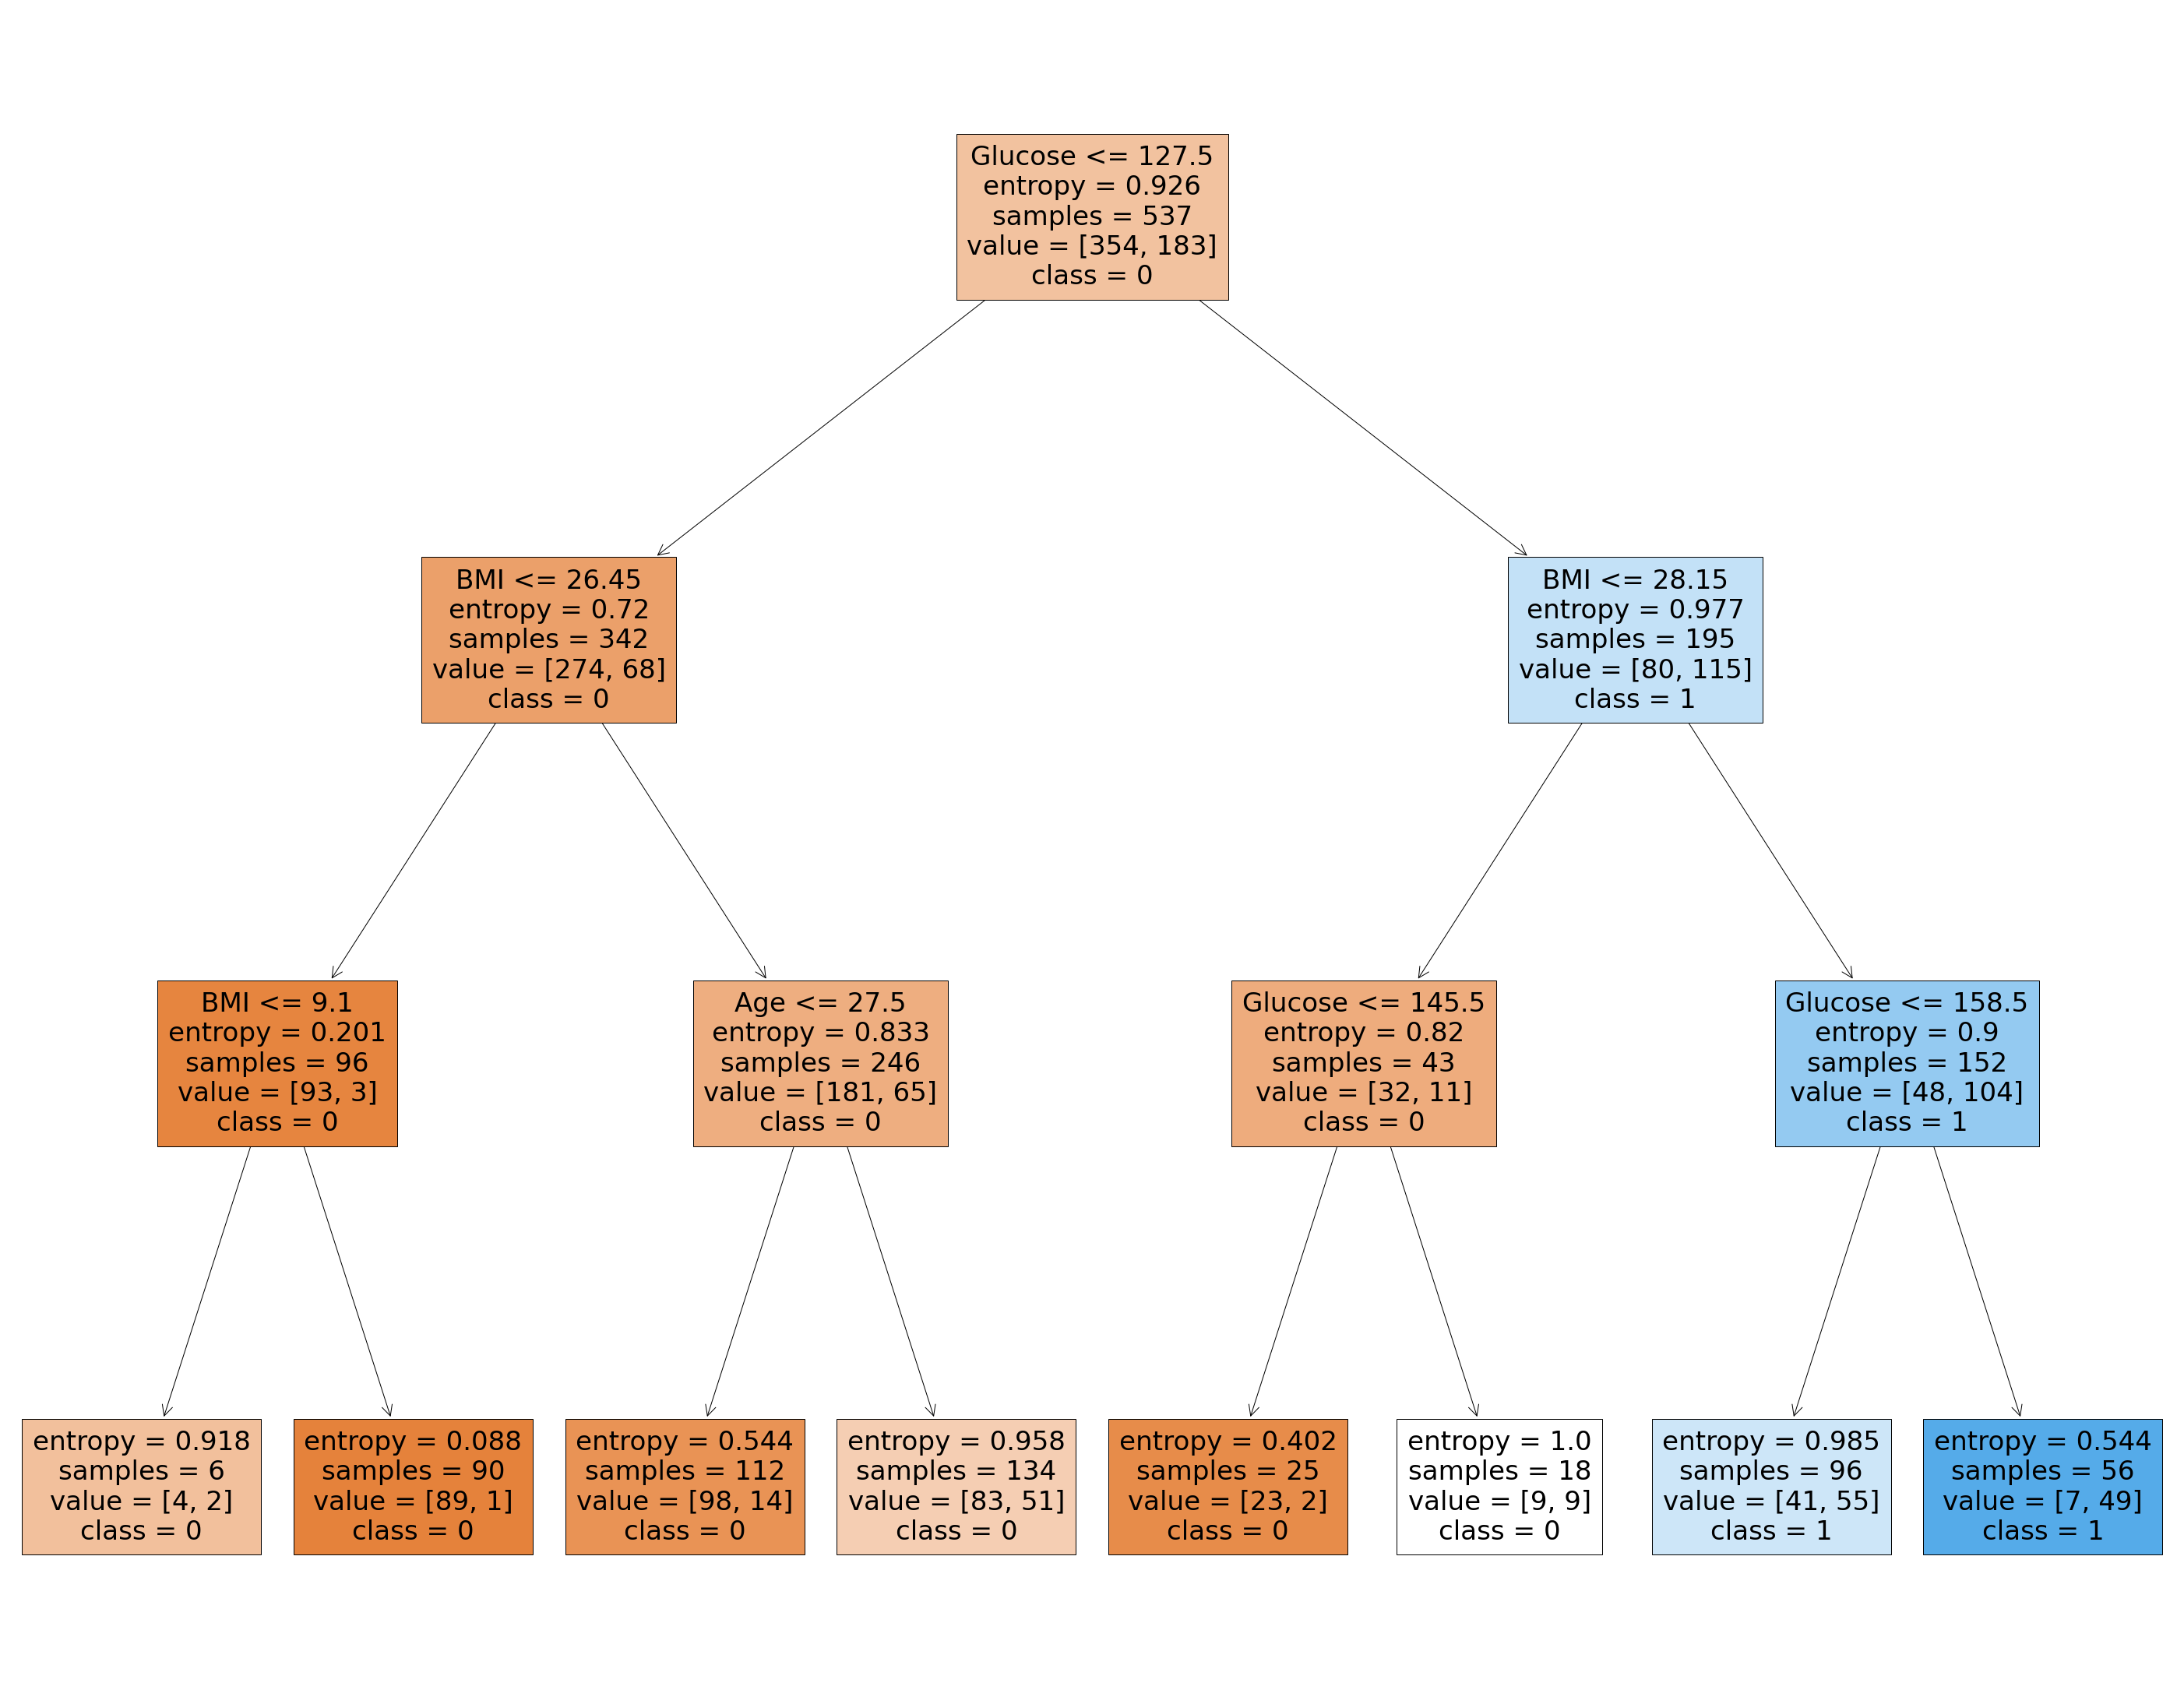

In [13]:
plt.figure(figsize=(50,40))
plot_tree(clf, feature_names=feature_cols, class_names=['0','1'], filled=True)
plt.show()